<a href="https://colab.research.google.com/github/shandilya8/google_playstore_apps/blob/main/android_app_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [3]:
df = pd.read_csv('/googleplaystore.csv')
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **1474 Missing values**

In [6]:
df[['Rating']].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


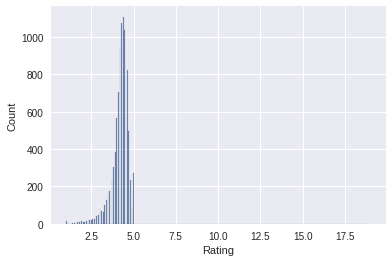

In [7]:
sns.histplot(x=df['Rating'])
plt.show()

# **App Rating Cannot be more than a 5**
**Outliers in ratings**

In [8]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Removing this column**

In [ ]:
df.drop(10472,axis=0,inplace=True)

In [ ]:
df.shape

(10840, 13)

In [ ]:
df.set_index([[i for i in range(10840)]],inplace=True)

In [ ]:
df[['Rating']].describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


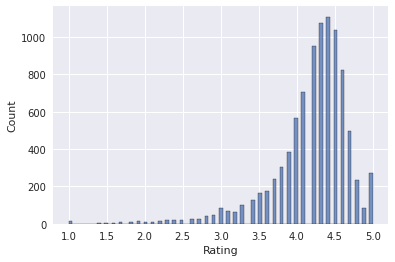

In [ ]:
sns.histplot(x=df['Rating'])
plt.show()

# **Filling NaN rating values based on Reviews**

In [ ]:
df['Reviews'].dtype == 'object' #is String type

True

In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Reviews'].dtype

dtype('int64')

In [ ]:
df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

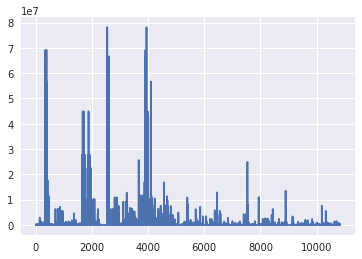

In [ ]:
df['Reviews'].plot(kind='line')
plt.show()

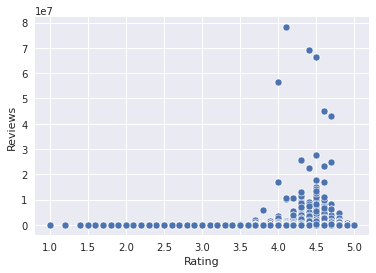

In [ ]:
sns.scatterplot(data=df[['Reviews','Rating']],x='Rating',y='Reviews')
plt.show()

# **Mean Reviews of apps with rating <=1**

In [ ]:
df['Reviews'][df['Rating'] <=1 ].mean()

1.75

# **Mean Reviews of apps with rating >1 and <=2**

In [ ]:
df['Reviews'][(df['Rating'] >1)&(df['Rating'] <=2) ].mean()

258.65384615384613

# **Mean Reviews of apps with rating >2 and <=3**

In [9]:
df['Reviews'][(df['Rating'] >2)& (df['Rating'] <=3) ].mean()

inf

# **Mean Reviews of apps with rating >3 and <=4**

In [ ]:
df['Reviews'][(df['Rating'] >3)& (df['Rating'] <=4) ].mean()

147931.15163934426

# **Mean Reviews of apps with rating >4**

In [ ]:
df['Reviews'][df['Rating'] > 4 ].mean()

660191.2251470588

In [ ]:
apps_no_rating = df[df['Rating'].isnull()]
apps_no_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [ ]:
apps_no_rating[['Reviews']].describe()

,Reviews
count,1474.000000
mean,18.062415
std,139.912271
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,3248.000000


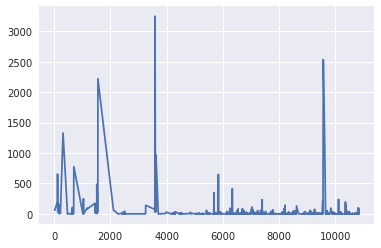

In [ ]:
apps_no_rating['Reviews'].plot(kind='line')
plt.show()

# **Since Maximum reviews is <5000 I set all app NaN ratings to 2.5**

In [ ]:
df['Rating'].fillna(2.5,inplace=True)

In [ ]:
df['Rating'].isna().sum()

0

# **Feature Engineering**

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Category column**

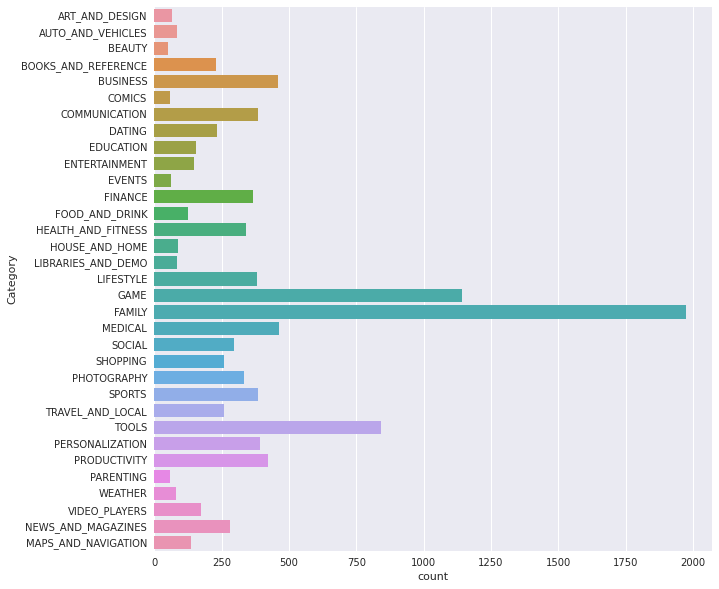

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['Category'])
plt.show()

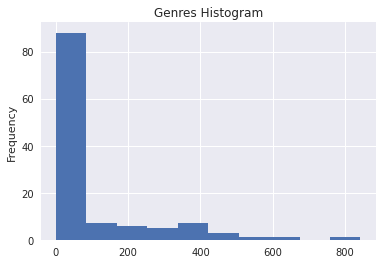

In [ ]:
df['Genres'].value_counts().plot(kind='hist')
plt.title("Genres Histogram")
plt.show()

# **Dropping Genres column because we had Category column**

In [ ]:
df.drop('Genres',inplace=True,axis=1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up


# **Size column**
1. Apps in MB
2. Apps in KB
3. Others

In [ ]:
df['Size'].shape

(10840,)

In [ ]:
size_in_mb = df['Size'][df['Size'].str.contains('M')]
size_in_mb = size_in_mb.str.replace('M','')
size_in_mb = pd.to_numeric(size_in_mb)
size_in_mb.dtype

dtype('float64')

In [ ]:
size_in_mb.shape

(8829,)

In [ ]:
size_in_kb = df['Size'][(df['Size'].str.contains('k'))]
size_in_kb = size_in_kb.str.replace('k','')
size_in_kb = pd.to_numeric(size_in_kb)
size_in_kb.dtype

dtype('float64')

In [ ]:
size_in_kb.shape

(316,)

# **Coonverting KB into MB**
**KB = 0.001*MB**

In [ ]:
size_in_kb = size_in_kb *0.001

In [ ]:
size_in_kb.head()

58     0.201
209    0.023
384    0.079
450    0.118
458    0.695
Name: Size, dtype: float64

In [ ]:
#Replacing Varies with device to -1
varies_with_device = df['Size'][df['Size'] == 'Varies with device']
varies_with_device.replace('Varies with device',-1,inplace=True)

In [ ]:
Size = [None for i in range(10840)]

In [ ]:
try:
    df.loc[10472] 
    # Deleted this row because of rating is 19 and 2 NaN values
except:
    print("Row 10472 does not exist")

In [ ]:
def set_size(data):
    for index in data.index:
        try:
            Size[index] = data.loc[index]
        except:
            print(index)

In [ ]:
set_size(size_in_kb)
set_size(size_in_mb)
set_size(varies_with_device)

In [ ]:
df['Size'] = Size

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up


# **Converting Installs column to numeric type**

In [ ]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(r'\D+','',regex=True))
df['Installs'].dtype

dtype('int64')

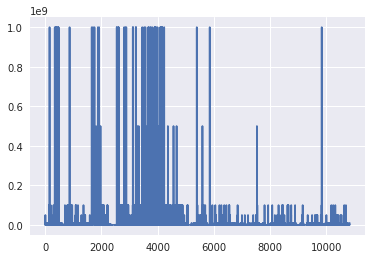

In [ ]:
df['Installs'].plot(kind='line')
plt.show()

# **Type Column**

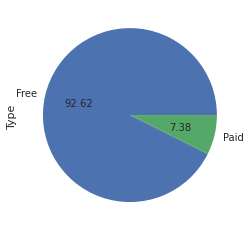

In [ ]:
df['Type'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [ ]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [ ]:
pd.to_numeric(df['Price'][df['Type'] == 'Free']).sum()

0

In [ ]:
df['Price'] = df['Price'].str.replace(r'\$','',regex=True)

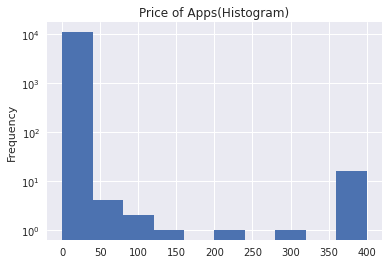

In [ ]:
df['Price'] = pd.to_numeric(df['Price'])
df['Price'].plot(kind='hist')
plt.title("Price of Apps(Histogram)")
plt.yscale('log')

# **Content Rating**

In [ ]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

**Setting 18+ and Unrated apps to Everyone**

In [ ]:
df['Content Rating'] = df['Content Rating'].replace(["Adults only 18+","Unrated"],["Everyone","Everyone"])
df['Content Rating'].value_counts()

Everyone        8719
Teen            1208
Mature 17+       499
Everyone 10+     414
Name: Content Rating, dtype: int64

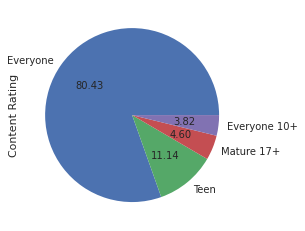

In [ ]:
df['Content Rating'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

# **Dropping "Last Updated" column**

In [ ]:
df.drop('Last Updated',axis=1,inplace=True)
df.shape

(10840, 11)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,1.1,4.4 and up


In [ ]:

other_versions = df['Android Ver'].value_counts()

# **Dropping "Current Ver" column**

In [ ]:
df.drop('Current Ver',axis=1,inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,4.4 and up


# **Android Version**

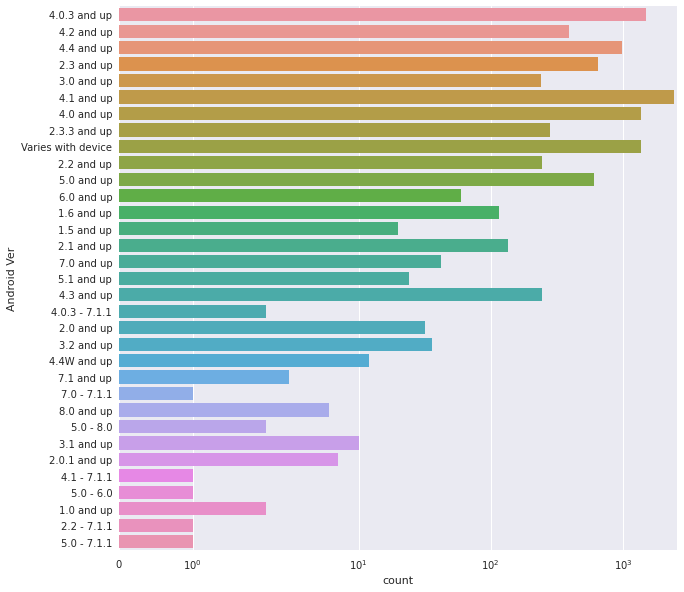

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['Android Ver'])
plt.xscale('symlog')
plt.show()

# **Setting Android Versions to others whose frequency is <100**

In [ ]:
#Android Verions Count <=100
other_versions[other_versions<=100].sum()

263

In [ ]:
other_versions = other_versions[other_versions<=100].keys()
other_versions

Index(['6.0 and up', '7.0 and up', '3.2 and up', '2.0 and up', '5.1 and up',
       '1.5 and up', '4.4W and up', '3.1 and up', '2.0.1 and up', '8.0 and up',
       '7.1 and up', '4.0.3 - 7.1.1', '5.0 - 8.0', '1.0 and up', '5.0 - 7.1.1',
       '7.0 - 7.1.1', '4.1 - 7.1.1', '5.0 - 6.0', '2.2 - 7.1.1'],
      dtype='object')

In [ ]:
df['Android Ver'].replace(other_versions,['Others' for i in range(19)], inplace=True)

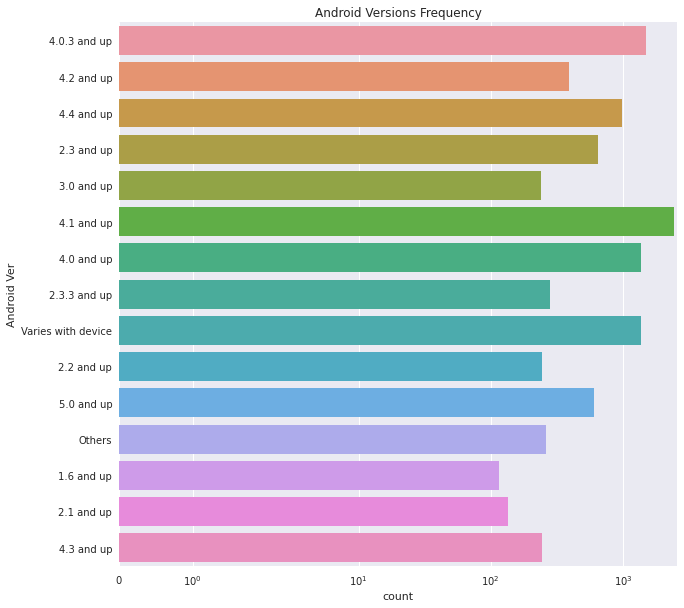

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['Android Ver'])
plt.xscale('symlog')
plt.title("Android Versions Frequency")
plt.show()

In [ ]:
app_names = pd.DataFrame({'App':df['App']})
app_names.head()

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book


In [ ]:
df.set_index('App',inplace=True)
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,4.4 and up


# **One Hot Encoding**

In [ ]:
df.dropna(how='any',inplace=True)
df.shape

(10837, 9)

In [ ]:
#Cols to encode
cols_to_encode = df.dtypes[df.dtypes == 'object'].keys()
cols_to_encode

Index(['Category', 'Type', 'Content Rating', 'Android Ver'], dtype='object')

In [ ]:
dummies = pd.get_dummies(df[cols_to_encode])
dummies.sample(5)

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Android Ver_3.0 and up,Android Ver_4.0 and up,Android Ver_4.0.3 and up,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_5.0 and up,Android Ver_Others,Android Ver_Varies with device
App,,,,,,,,,,,,,,,,,,,,,
Genius Scan - PDF Scanner,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AP Mobile - Breaking News,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BZ-Smart,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vargo Anesthesia Mega App,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
BK Chat,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.drop(cols_to_encode,axis=1,inplace=True)
df.head()

,Rating,Reviews,Size,Installs,Price
App,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0
Coloring book moana,3.9,967,14.0,500000,0.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7,5000000,0.0
Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0


In [ ]:
df.shape,dummies.shape

((10837, 5), (10837, 54))

In [ ]:
new_df = pd.concat([df,dummies],axis=1)
new_df.shape

(10837, 59)

In [ ]:
(new_df.isna().sum().sum())

0

In [ ]:
new_df.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Android Ver_3.0 and up,Android Ver_4.0 and up,Android Ver_4.0.3 and up,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_5.0 and up,Android Ver_Others,Android Ver_Varies with device
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Coloring book moana,3.9,967,14.0,500000,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7,5000000,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# **Feature Scaling**

In [ ]:
xdf = new_df.copy(deep=True)

In [ ]:
cols_to_scale = "Rating 	Reviews 	Size 	Installs 	Price".split(" 	")
cols_to_scale

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [ ]:
scalled = scale.fit_transform(xdf[cols_to_scale])

In [ ]:
i=0
for col in cols_to_scale:
    xdf[col] = scalled[:,i]
    print(col)
    i += 1

Rating
Reviews
Size
Installs
Price


# **Data Contains Duplicate Values**

In [ ]:
xdf['App']=xdf.index
xdf.drop_duplicates(subset='App',inplace=True)
xdf.shape

(9656, 60)

In [ ]:
xdf.drop('App',axis=1,inplace=True)
xdf.shape

(9656, 59)

In [ ]:
app_names = pd.DataFrame({'App':xdf.index})
app_names.shape

(9656, 1)

# **Recommendation Model Build and  Predictions**

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
model = NearestNeighbors(metric='euclidean')
model.fit(xdf)

NearestNeighbors(metric='euclidean')

In [ ]:
def getRecommendedApps(appname,recommend_apps=5,get_similarity=False):
    distances,neighbors = model.kneighbors(xdf.loc[appname],n_neighbors=recommend_apps+1)
    print(f'Similar Apps for "{appname[0]}:"')
    print(neighbors[0][1:])
    similar_apps = []
    for neighbor in neighbors[0][1:]:
        similar_apps.append(app_names.loc[neighbor][0])
    if not get_similarity:
        return similar_apps
    similarity = []
    for app in similar_apps:
        sim = cosine_similarity(xdf.loc[[appname[0]]],xdf.loc[[app]]).flatten()[0]
        similarity.append(sim*100)
    sim_df = pd.DataFrame({'App':similar_apps,'Similarity':similarity})
    sim_df.sort_values(by='Similarity',ascending=False)
    return sim_df

In [ ]:
app_names.loc[[565]]

,App
565,Online Girls Chat


In [ ]:
getRecommendedApps(app_names.loc[565],get_similarity=True)

Similar Apps for "Online Girls Chat:"
[513 505 508 515 564]


,App,Similarity
0,FREE VIDEO CHAT - LIVE VIDEO AND TEXT CHAT,99.999001
1,Live Girls Talk - Free Video Chat,99.998562
2,Girls Live Chat - Free Text & Video Chat,99.998042
3,Live Chat - Free Video Chat Rooms,99.998042
4,Girls Online Talk - Free Text and Video Chat,99.994701


In [ ]:
getRecommendedApps(app_names.loc[1023],get_similarity=True)

Similar Apps for "Seamless Food Delivery/Takeout:"
[ 969 1022  970 1018 1011]


,App,Similarity
0,Grubhub: Food Delivery,99.998835
1,Uber Eats: Local Food Delivery,99.949156
2,Panera Bread,99.944368
3,EatStreet Food Delivery App,99.912295
4,OpenTable: Restaurants Near Me,99.767539


In [ ]:
getRecommendedApps(app_names.loc[1029],get_similarity=True)

Similar Apps for "Lose Belly Fat in 30 Days - Flat Stomach:"
[1031 3921 1056 4947 1110]


,App,Similarity
0,Six Pack in 30 Days - Abs Workout,99.995725
1,Abs Workout - Burn Belly Fat with No Equipment,99.993723
2,Bike Computer - GPS Cycling Tracker,99.823670
3,Fitness Dance for Zum.ba Workout Exercise,99.731602
4,Headspace: Meditation & Mindfulness,99.169275


In [ ]:
getRecommendedApps(app_names.loc[6712])

Similar Apps for "Ultimate Calculator for CR:"
[3689 2787 8063 2795 2738]


['T-Mobile Content Transfer',
 'WPS Office - Word, Docs, PDF, Note, Slide & Sheet',
 'Epson iProjection',
 'Squid - Take Notes & Markup PDFs',
 'MyMTN']

In [ ]:
getRecommendedApps(app_names.loc[1923],get_similarity=True)

Similar Apps for "Labs on Demand:"
[1968 1876 5571 1927 1888]


,App,Similarity
0,BURST Professionals,99.857718
1,5 Minute Clinical Consult 2019 - #1 for 25 years,99.475821
2,MedM Blood Pressure,99.428949
3,Jaylex,96.125017
4,5 Minute Veterinary Consult: Canine & Feline,95.283581
